# **Imports**

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.spatial.distance import hamming
import collections

# **Hopfield Networks**

## Building a Hopfield Network

In [ ]:
def make_biases(n):
  output = []
  for i in range(n):
    #output.append(np.random.randint(-2,2))
    output.append(np.random.random()*2-1)
  return np.array(output)

In [ ]:
def make_weights(n):
  output = np.zeros((n, n))
  for i in range(n):
    for j in range(n):
      output[i][j] = np.random.random()*2 - 1
      #output[i][j] = np.random.randint(-2,2)
  return np.array(output)

In [ ]:
class hopfieldNetwork:
  def __init__(self, states, n):
    self.states = states
    self.biases = make_biases(n)
    self.weights = make_weights(n)
    self.n = n

  def calcEnergy(self):
    #energy = -0.5*np.matmul(np.matmul(self.states.T, self.weights), self.states) + np.sum(self.biases*self.states)
    energy = -0.5* self.states@self.weights@self.states + np.sum(self.states*self.biases)
    return energy

  def calcEnergyGiven(self, states):
    energy = -0.5* states@self.weights@states + np.sum(states*self.biases)
    #energy = -0.5*np.matmul(np.matmul(state.T, self.weights), state) + np.sum(self.biases*state)
    return energy

  def will_update(self, n):
    states = np.copy(self.states)
    states[n] *= -1
    if(self.calcEnergy() > self.calcEnergyGiven(states)):
      return True
    return False

  def update(self):
    neuron = np.random.randint(0, self.n)
    initial = self.calcEnergy()
    self.states[neuron] *= -1
    after = self.calcEnergy()
    delta = after - initial
    if(delta > 0):
      self.states[neuron] *= -1

  def check_converge(self):
    for i in range(self.n):
      initial = self.calcEnergy()
      self.states[i] *= -1
      after = self.calcEnergy()
      delta = after - initial
      if(delta < 0):
        return False
      self.states[i] *= -1
    return True

  def set_states(self, states):
    self.states = states

  def set_weights_images(self, images):
    weights = 0
    for image in images:
      weights += np.outer(image.T, image)
    self.weights = 0.5*weights

## Seeing that Energy Goes Down

In [ ]:
es = []
xs = []
n = 100
for i in range(9):
  print(i)
  init = np.random.choice([-1, 1], n)
  network = hopfieldNetwork(init, n)
  e = [network.calcEnergy()]
  x = [0]
  for j in range(2000):
    network.update()
    if(j % 100 == 0):
      e.append(network.calcEnergy())
      x.append(j/100)
  es.append(e)
  xs.append(x)

0
1
2
3
4
5
6
7
8


[0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0]


Text(0, 0.5, 'Energy')

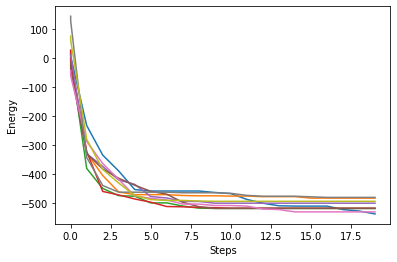

In [ ]:
print(xs[0])
for i in range(9):
  plt.plot(xs[i], es[i])

plt.xlabel('Steps')
plt.ylabel('Energy')

## Training Inputs

In [ ]:
def binToState(num):
  output = []
  for i in range(len(num)):
    if(num[i] == '0'):
      output.append(-1)
    else:
      output.append(1)
  return np.array(output)

In [ ]:
def corrupt_quarter(image):
  quarter = int(len(image)/4)
  for i in range(quarter):
    image[i] = 1
  return image

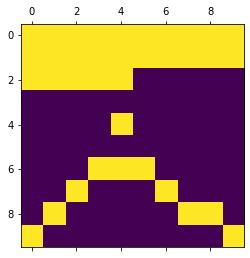

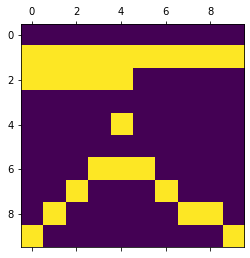

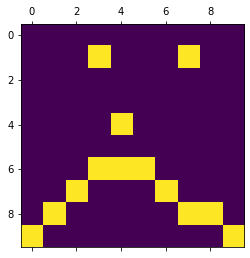

In [ ]:
#corrupting 1/4 of image
n = 100
init = np.random.choice([-1, 1], n)
picture_net = hopfieldNetwork(init, n)
smiley = '0000000000000100010000000000000000000000000010000000000000000001110000001000100001000001101000000001'
smileyState = binToState(smiley)
tree = '0001111000000111100000001100000000110000001111111000001100100000110000000011000000001100000000110000'
treeState = binToState(tree)
images = [smileyState, treeState]
picture_net.set_weights_images(images)

init_corrupt = corrupt_quarter(smileyState)
plt.matshow(init_corrupt.reshape((10, 10)))
picture_net.set_states(init_corrupt)
idx = 0
while(picture_net.check_converge() == False):
  idx += 1
  if(idx == 10):
    plt.matshow(picture_net.states.reshape(10, 10))
  picture_net.update()
plt.matshow(picture_net.states.reshape((10, 10)))

In [ ]:
def perturb(k, image):
  for i in range(k):
    rand = np.random.randint(len(image))
    image[rand] *= -1
  return image

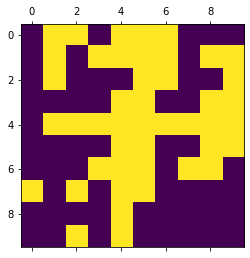

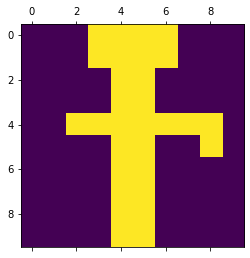

In [ ]:
#perturbs in k spots
n = 100
init = np.random.choice([-1, 1], n)
picture_net = hopfieldNetwork(init, n)
picture_net.set_weights_images(images)

init_corrupt = perturb(25, treeState)
plt.matshow(init_corrupt.reshape((10, 10)))
picture_net.set_states(init_corrupt)
while(picture_net.check_converge() == False):
  picture_net.update()
plt.matshow(picture_net.states.reshape((10, 10)))

## How Many Memories?

In [ ]:
def make_memories(p, n):
  mems = []
  for i in range(p):
    mems.append(np.random.choice([-1,1], n))
  return mems

In [ ]:
def corrupt_k(k, image):
  idxs = np.arange(0, len(image)-1, 1)
  output = image.copy()
  np.random.shuffle(idxs)
  for i in range(k):
    output[int(idxs[i])] *= -1
  return output

In [ ]:
image = np.ones(10)
print(corrupt_k(4, image))

[ 1.  1.  1. -1.  1. -1.  1. -1. -1.  1.]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


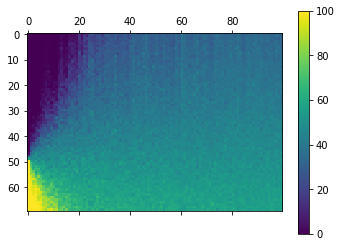

In [ ]:
n = 100
ps = np.arange(1, 101, 1)
ks = np.arange(1, 71, 1)
matrix = np.zeros((70, 100))

for p in ps:
  print(p)
  mems = make_memories(p, n)
  network = hopfieldNetwork(np.random.choice([-1, 1], n), n)
  network.set_weights_images(mems)
  for k in ks:
    dists = []
    for i in range(20):
      rand = np.random.randint(p)
      target = mems[rand]
      corrupt = corrupt_k(k, target)
      network.set_states(corrupt)
      while(network.check_converge() == False):
        network.update()

      dists.append(hamming(target, network.states)*len(target))
    matrix[k-1][p-1] = np.average(dists)

plt.matshow(matrix)
plt.colorbar()

In [ ]:
print(matrix)

## Energy Landscape

In [ ]:
def stateToInt(state):
  binary = ''
  for i in range(len(state)):
    if(state[i] == -1):
      binary += '0'
    else:
      binary += '1'
  return int(binary, 2)

In [ ]:
def equal(arr1, arr2):
  for i in range(len(arr1)):
    if(arr1[i] != arr2[i]):
      return False
  return True

In [ ]:
n = 7
memories = make_memories(2, n)
network = hopfieldNetwork(np.random.choice([-1, 1], n), n)
network.set_weights_images(memories)

0 -> 64
0 -> 8
1 -> 65
1 -> 9
1 -> 5
1 -> 3
1 -> 0
2 -> 66
2 -> 10
2 -> 6
2 -> 0
2 -> 3
3 -> 67
3 -> 7
4 -> 68
4 -> 12
4 -> 0
4 -> 6
4 -> 5
5 -> 69
5 -> 7
6 -> 70
6 -> 7
7 -> 71
8 -> 72
9 -> 73
9 -> 8
10 -> 74
10 -> 8
11 -> 75
11 -> 3
11 -> 15
11 -> 9
11 -> 10
12 -> 76
12 -> 8
13 -> 77
13 -> 5
13 -> 9
13 -> 15
13 -> 12
14 -> 78
14 -> 6
14 -> 10
14 -> 12
14 -> 15
15 -> 79
15 -> 7
16 -> 48
16 -> 0
16 -> 24
17 -> 49
17 -> 1
17 -> 25
17 -> 21
17 -> 19
17 -> 16
18 -> 50
18 -> 2
18 -> 26
18 -> 22
18 -> 16
18 -> 19
19 -> 51
19 -> 3
19 -> 23
20 -> 52
20 -> 4
20 -> 28
20 -> 16
20 -> 22
20 -> 21
21 -> 53
21 -> 5
21 -> 23
22 -> 54
22 -> 6
22 -> 23
23 -> 55
23 -> 7
24 -> 56
24 -> 8
25 -> 57
25 -> 9
25 -> 24
26 -> 58
26 -> 10
26 -> 24
27 -> 59
27 -> 11
27 -> 19
27 -> 31
27 -> 25
27 -> 26
28 -> 60
28 -> 12
28 -> 24
29 -> 61
29 -> 13
29 -> 21
29 -> 25
29 -> 31
29 -> 28
30 -> 62
30 -> 14
30 -> 22
30 -> 26
30 -> 28
30 -> 31
31 -> 63
31 -> 15
31 -> 23
32 -> 0
32 -> 48
32 -> 40
33 -> 1
33 -> 49
33 -> 41


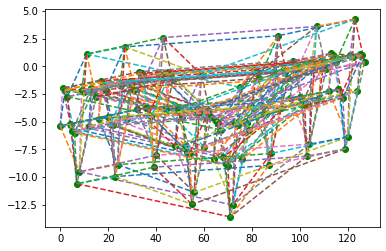

In [ ]:
#looping through each state
for i in range(2**n):
  integer = i
  binary = str(bin(i))[2:]
  while(len(binary) != n):
    binary = '0' + binary
  state = binToState(binary)
  network.set_states(state)
  plt.plot(i, network.calcEnergy(), 'o', color='g')
  #checking updates
  for j in range(n):
    #if would update (aka energy decreases), draw edge from state to updated
    if(network.will_update(j)):
      updated = state.copy()
      updated[j] *= -1
      before = i
      after = stateToInt(updated)
      plt.plot([before, after], [network.calcEnergy(), network.calcEnergyGiven(updated)], '--')
      print(before, '->', after)

print(stateToInt(memories[0]))
print(stateToInt(memories[1]))

# **Restricted Boltzmann Machines**

## RBM As Ising Model

In [ ]:
from scipy.special import expit
class RBM:
  def __init__(self, v, h, data='normal'):
    self.v = v
    self.h = h
    if(data=='normal'):
      self.biases_v = self.make_biases(len(v))
      self.biases_h = self.make_biases(len(h))
      self.weights = self.make_weights(len(v), len(h))
    elif(data=='MNIST'):
      self.biases_v = self.make_biases_mnist(len(v))
      self.biases_h = np.zeros(len(h))
      self.weights = self.make_weights_mnist(len(v), len(h))

  def make_biases_mnist(self, n):
    output = np.zeros(n)
    for i in range(n):
      output[i] = np.random.uniform(-0.01, 0.01)
    return np.array(output)

  def make_weights_mnist(self, v, h):
    output = np.zeros((v, h))
    for i in range(v):
      for j in range(h):
        output[i][j] = np.random.uniform(-0.01, 0.01)
    return np.array(output)

  def make_biases(self, n):
    output = np.zeros(n)
    for i in range(n):
      output[i] = np.random.randint(-2,2)
    return np.array(output)

  def make_weights(self, v, h):
    output = np.zeros((v, h))
    for i in range(v):
      for j in range(h):
        #output[i][j] = np.random.random()*2 - 1
        output[i][j] = np.random.randint(-2,2)
    return np.array(output)

  def calcEnergy(self):
    first, second, third = 0, 0, 0
    for i in range(len(self.v)):
      second += self.v[i]*self.biases_v[i]
      for j in range(len(self.h)):
        if(i == 0):
          third += self.h[j]*self.biases_h[j]
        first += self.v[i]*self.weights[i][j]*self.h[j]
    return -1*first - second - third

  def m_j(self, j):
    output = 0
    for i in range(len(self.v)):
      output += self.v[i]*self.weights[i][j]
    return output + self.biases_h[j]

  def m_i(self, i):
    output = 0
    for j in range(len(self.h)):
      output += self.weights[i][j]*self.h[j]
    return output + self.biases_v[i]

  def sample_hidden(self):
    for j in range(len(self.h)):
        mj = self.m_j(j)
        prob_hv = np.exp(mj)/(np.exp(mj) + np.exp(-mj))
        rand = np.random.rand()
        if(rand < prob_hv):
          self.h[j] = 1
        else:
          self.h[j] = -1
    return self.h

  def sample_visible(self):
    for i in range(len(self.v)):
        mi = self.m_i(i)
        prob_vh = np.exp(mi)/(np.exp(mi) + np.exp(-mi))
        rand = np.random.rand()
        if(rand < prob_vh):
          self.v[i] = 1
        else:
          self.v[i] = -1
    return self.v

  def gibbs(self, k=10):
    #sample each k times
    for round in range(k):
      '''
      #step 1: sample p(h|v)
      self.sample_hidden()
      #step 2: sample p(v|h)
      self.sample_visible()
      '''
      ph1, h1 = self.h_given_v(self.v)
      pv1, v1 = self.v_given_h(h1)
      self.v = v1
      self.h = h1
    return self.v, self.h

  def get_p(self):
    vfs = []
    for i in range(10000):
      vf, hf = self.gibbs(10)
      vfs.append(stateToInt(vf))
    sample = {}
    for i in range(2**len(self.v)):
      sample[i] = 10**-30
    for i in range(len(vfs)):
      if(vfs[i] in sample.keys()):
        sample[vfs[i]] += 1
      else:
        sample[vfs[i]] = 1
    for i in sample.keys():
      sample[i] = sample[i]/10000
    return sample

  def get_O(self, prob_dist):
    O = 0
    p_v = self.get_p()
    #print('curr prob dist:', p_v)
    for i in range(2**len(self.v)):
      O += prob_dist[i]*np.log(prob_dist[i]/list(p_v.values())[i])
    return O

  def h_given_v(self, v):
    p = expit(np.matmul(v, self.weights) + self.biases_h)
    return (p, np.random.binomial(1, p=p))

  def v_given_h(self, h):
    p = expit(np.matmul(h, self.weights.T) + self.biases_v)
    return (p, np.random.binomial(1, p=p))

  def batchToState(self, batch):
    output = []
    for val in batch:
      binary = str(bin(val))[2:]
      while(len(binary) != len(self.v)):
        binary = '0' + binary
      curr = []
      for i in range(len(binary)):
        curr.append(int(binary[i]))
      output.append(curr)
    return np.array(output)

  def compute_grads(self, batch, data_type):
    if(data_type=='normal'):
      batch = self.batchToState(batch)
    b_size = batch.shape[0]
    v0 = batch.reshape(b_size, -1)
    ph0, h0 = self.h_given_v(v0)
    W_grad = np.matmul(v0.T, ph0)
    v_grad = np.sum(v0, axis=0, dtype=float)
    h_grad = np.sum(ph0, axis=0, dtype=float)

    pv1, v1 = self.v_given_h(h0)
    ph1, h1 = self.h_given_v(pv1)

    W_grad -= np.matmul(pv1.T, ph1)
    v_grad -= np.sum(pv1, axis=0)
    h_grad -= np.sum(ph1, axis=0)

    W_grad = W_grad/b_size
    h_grad = h_grad/b_size
    v_grad = v_grad/b_size

    recon_err = np.mean(np.sum((v0 - pv1)**2, axis=1), axis=0) # sum of squared error averaged over the batch
    return W_grad, h_grad, v_grad, recon_err

  def update_params(self, rate, W_grad, h_grad, v_grad):
    self.weights += rate*W_grad
    self.biases_v += rate*v_grad
    self.biases_h += rate*h_grad

  def shuffle2d(self, data):
    output = []
    idxs = np.linspace(0, len(data)-1, len(data), dtype=int)
    np.random.shuffle(idxs)
    count = 0
    for i in idxs:
      output.append(np.array(data[i]))
    return np.array(output)

  def train(self, epochs, data, M, rate, k, data_type='normal'):
    avg_energies = []
    for e in range(epochs):
      error = 0
      #print('O at epoch', e, 'is', self.get_O(prob_dist))
      if(data_type=='normal'):
        np.random.shuffle(data)
      if(data_type=='MNIST'):
        #shuffle the 2d data somehow
        data = self.shuffle2d(data)
      energies = []
      for d in range(0, len(data)-M, M):
        if(data_type == 'normal'):
          batch = data[d:d+M]
        if(data_type=='MNIST'):
          batch = data[d:d+M, :]
        W_grad, h_grad, v_grad, recon_err = self.compute_grads(batch, data_type)
        error += recon_err
        self.update_params(rate, W_grad, h_grad, v_grad)
        energies.append(self.avg_free_energy(batch, data_type))
      avg_energies.append(np.mean(np.array(energies)))
      print('Error at epoch', e, 'is', error)
    return avg_energies

  def train2(self, epochs, data, M, rate, k, prob_dist):
    for e in range(epochs):
      print(e)
      np.random.shuffle(data)
      for d in range(0, len(data)-M, M):
        batch = data[d:d+M]
        grad_weights, grad_bv, grad_bh = 0, 0, 0
        avg_weights, avg_bv, avg_bh = [], [], []
        #loop over mini batch
        for r in range(M):
          #picking random visible and converting to state
          #rand = np.random.randint(0, len(batch))
          #binary = str(bin(batch[rand]))[2:]
          self.v = intToState(batch[r], len(self.v))
          #sample hidden
          dist, sample_h = self.h_given_v(self.v)
          #update weights
          grad_weights -= np.outer(self.v, sample_h)
          grad_bv -= self.v
          grad_bh -= sample_h
          #gibbs sampling
          vf, hf = self.gibbs(k)
          #update weights
          grad_weights += np.outer(vf, hf)
          grad_bv += vf
          grad_bh += hf
          avg_weights.append(grad_weights)
          avg_bv.append(grad_bv)
          avg_bh.append(grad_bh)

        w = [x/M for x in avg_weights]
        w = np.average(w)
        bv = [x/M for x in avg_bv]
        bv = np.average(bv)
        bh = [x/M for x in avg_bh]
        bh = np.average(bh)

        self.weights -= rate*w
        self.biases_v -= rate*bv
        self.biases_h -= rate*bh

  def avg_free_energy(self, batch, data_type):
    #for zeros and ones
    if(data_type=='normal'):
      batch = self.batchToState(batch)
    x = self.biases_h + np.matmul(batch, self.weights)
    free_energy_batch = -np.matmul(batch, self.biases_v) - np.sum(np.log(1 + np.exp(x)), axis=1)
    return np.mean(free_energy_batch)

  #for zeros and ones
  def free_energy_sum(self, v):
    total = np.sum(np.log(1+np.exp(self.biases_h + np.dot(self.weights.T, v))))
    energy = -v@self.biases_v - total
    return energy

  def free_energy_en(self, v):
    energy = 0
    self.v = v
    for i in range(2**len(self.h)):
      self.h = intToState(i, len(self.h))
      energy += np.exp(-self.calcEnergy())
    energy = -np.log(energy)
    return energy


## Probability Distributions

[-1 -1 -1  1 -1]
['-11', '11', '-11', '11', '-11', '-11', '-11', '11', '11', '11', '11', '-11', '-11', '11', '11', '11', '-11', '-11', '-11', '-11', '11', '11', '11', '11', '11', '11', '11', '11', '-11', '11', '11', '-11', '-11', '-11', '11', '11', '-11', '11', '11', '-11', '11', '-11', '11', '-11', '11', '-11', '11', '11', '-11', '-11', '-11', '11', '11', '-11', '11', '11', '-11', '-11', '11', '-11', '-11', '11', '11', '11', '11', '-11', '11', '-11', '-11', '-11', '11', '-11', '11', '-11', '-11', '-11', '11', '-11', '-11', '11', '-11', '-11', '-11', '-11', '11', '-11', '11', '-11', '11', '-11', '11', '11', '11', '-11', '-11', '-11', '11', '-11', '-11', '11', '11', '11', '-11', '-11', '11', '-11', '-11', '-11', '-11', '-11', '-11', '-11', '11', '-11', '11', '11', '-11', '-11', '11', '11', '-11', '11', '-11', '-11', '11', '11', '11', '11', '-11', '-11', '-11', '-11', '-11', '11', '11', '11', '-11', '11', '-11', '11', '-11', '11', '-11', '11', '-11', '11', '11', '-11', '11', '-11', '-11'

Text(0, 0.5, 'Count')

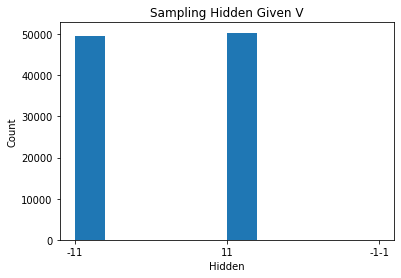

In [ ]:
Nh = 2
Nv = 5
v = np.random.choice([-1, 1], Nv)
print(v)
h = np.random.choice([-1, 1], Nh)
rbm = RBM(v, h)

hidden_sample = []
for i in range(100000):
  hidden_list = rbm.sample_hidden()
  curr = ''
  for j in range(len(hidden_list)):
    curr += str(hidden_list[j])
  #make list into string then append to list
  hidden_sample.append(curr)

print(hidden_sample)
plt.hist(hidden_sample)
plt.title("Sampling Hidden Given V")
plt.xlabel('Hidden')
plt.ylabel('Count')

In [ ]:
#theoretical
probs = []
hidden = [[-1, -1], [-1, 1], [1, -1], [1, 1]]
for i in range(len(hidden)):
  rbm.h = hidden[i]
  probs.append(np.exp(-rbm.calcEnergy()))

print('theoretical:')
denom = np.sum(np.array(probs))
for i in range(len(probs)):
  probs[i] = probs[i]/denom
  print('h = ', hidden[i], 'p =', probs[i])

print('from sampling:')
counter = collections.Counter(hidden_sample)
for i in range(len(counter.keys())):
  print('h =', list(counter.keys())[i], 'p =', list(counter.values())[i]/100000)

theoretical:
h =  [-1, -1] p = 3.7750881542500385e-11
h =  [-1, 1] p = 6.144136851333175e-06
h =  [1, -1] p = 6.144136851333175e-06
h =  [1, 1] p = 0.9999877116885464
from sampling:
h = 11 p = 0.99998
h = -11 p = 2e-05


In [ ]:
print(rbm.h_given_v([-1,  -1, -1, 1,  -1]))

(array([0.5       , 0.99752738]), array([1, 1]))


[26, 26, 26, 26, 26, 26, 26, 18, 26, 10, 26, 24, 26, 2, 26, 26, 24, 18, 26, 26, 26, 26, 26, 26, 18, 26, 18, 26, 26, 18, 24, 26, 26, 26, 26, 26, 26, 18, 26, 26, 24, 26, 24, 26, 10, 26, 8, 26, 16, 16, 26, 10, 26, 18, 26, 26, 26, 26, 18, 10, 26, 26, 18, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 24, 10, 18, 2, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 8, 26, 26, 26, 10, 10, 26, 26, 26, 2, 26, 18, 18, 24, 26, 26, 26, 10, 26, 26, 26, 26, 26, 26, 24, 18, 26, 26, 26, 26, 18, 26, 18, 26, 26, 24, 26, 26, 26, 26, 18, 8, 24, 26, 26, 26, 26, 26, 26, 26, 24, 18, 26, 26, 24, 10, 26, 26, 24, 24, 26, 18, 10, 26, 24, 10, 26, 26, 26, 26, 26, 26, 8, 26, 10, 26, 26, 24, 26, 26, 26, 26, 26, 26, 18, 24, 26, 26, 26, 10, 26, 26, 26, 18, 26, 26, 26, 26, 26, 26, 26, 8, 26, 26, 26, 24, 26, 26, 26, 24, 24, 10, 26, 24, 26, 26, 26, 24, 26, 8, 10, 26, 26, 18, 18, 26, 26, 26, 26, 26, 26, 26, 26, 26, 11, 8, 26, 18, 16, 30, 10, 18, 26, 26, 26, 2, 26, 18, 26, 18, 26, 26, 26, 26, 26, 26, 26, 26, 8, 26, 26, 26,

Text(0, 0.5, 'Count')

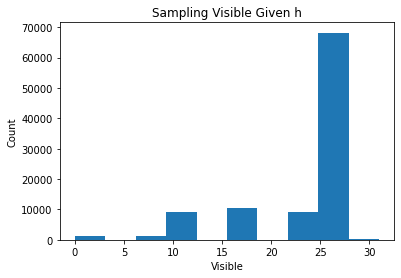

In [ ]:
Nh = 2
Nv = 5
v = np.random.choice([-1, 1], Nv)
h = np.random.choice([-1, 1], Nh)
rbm2 = RBM(v, h)

visible_sample = []
for i in range(100000):
  visible_list = rbm2.sample_visible()
  visible_sample.append(stateToInt(visible_list))

print(visible_sample)
plt.hist(visible_sample)
plt.title("Sampling Visible Given h")
plt.xlabel('Visible')
plt.ylabel('Count')

Average Difference: 8.811180826895228e-05
Max Difference: 0.0008712819257862686


Text(0.5, 1.0, 'p(v|h)')

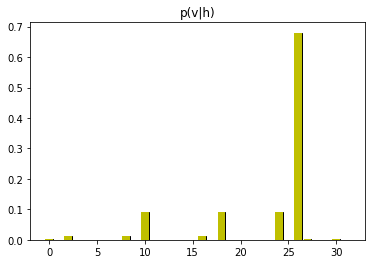

In [ ]:
#theoretical p(v|h)
probs_v = []
n = 5
visible = []
#looping through all possible visible states
xs = []
for i in range(2**n):
  xs.append(i)
  #finding state of -1s and 1s for visible neurons from binary
  binary = str(bin(i))[2:]
  while(len(binary) != n):
    binary = '0' + binary
  state = binToState(binary)
  visible.append(state)
  #setting visible neurons to current state and calculating numerator
  rbm2.v = state
  probs_v.append(np.exp(-rbm2.calcEnergy()))

#print('theoretical:')
theory = {}
denom = np.sum(np.array(probs_v))
for i in range(len(probs_v)):
  probs_v[i] = probs_v[i]/denom
  v = stateToInt(visible[i])
  if(v in theory.keys()):
      theory[v] += probs_v[i]
  else:
      theory[v] = probs_v[i]

theory_ord = collections.OrderedDict(sorted(theory.items()))

#print('from sampling:')
sample = {}
for i in range(len(visible_sample)):
  if(visible_sample[i] in sample.keys()):
    sample[visible_sample[i]] += 1
  else:
    sample[visible_sample[i]] = 1

for i in sample.keys():
  sample[i] = sample[i]/100000

sample_ord = collections.OrderedDict(sorted(sample.items()))

differences = []
sample_idx = 0
for i in range(len(list(theory_ord.values()))):
  if(list(sample_ord.keys())[sample_idx] != list(theory_ord.keys())[i]):
    differences.append(list(theory_ord.values())[i])
  else:
    differences.append(list(theory_ord.values())[i] - list(sample_ord.values())[sample_idx])
    if(sample_idx < len(list(sample_ord.keys()))-1):
      sample_idx += 1

print('Average Difference:', np.mean(np.abs(differences)))
print('Max Difference:', np.max(differences))
plt.bar(list(theory_ord.keys()), theory_ord.values(), color='b', fill = False)
plt.bar(list(sample_ord.keys()), sample_ord.values(), color='y')
plt.title('p(v|h)')

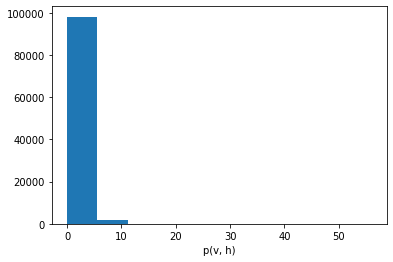

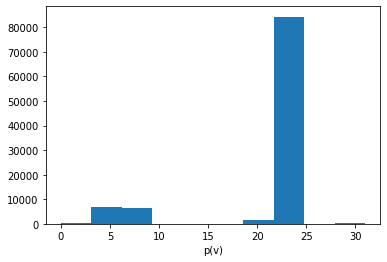

Text(0.5, 0, 'p(h)')

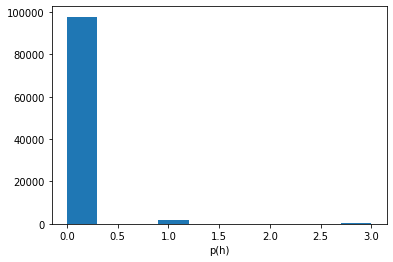

In [ ]:
Nh = 2
Nv = 5
v = np.random.choice([-1, 1], Nv)
h = np.random.choice([-1, 1], Nh)
rbm = RBM(v, h)
vfs = []
hfs = []
pairs = []

for i in range(100000):
  vf, hf = rbm.gibbs(10)
  v_int = stateToInt(vf)
  h_int = stateToInt(hf)
  pairs.append(v_int*h_int)
  vfs.append(v_int)
  hfs.append(h_int)

plt.hist(pairs)
plt.xlabel('p(v, h)')
plt.show()
plt.hist(vfs)
plt.xlabel('p(v)')
plt.show()
plt.hist(hfs)
plt.xlabel('p(h)')

theoretical:
from sampling:
odict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 38, 39, 40, 42, 44, 45, 46, 48, 50, 51, 52, 54, 56, 57, 58, 60, 62, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93])
odict_keys([0, 2, 3, 5, 6, 7, 8, 12, 14, 15, 16, 18, 19, 22, 23, 24, 28, 30, 32, 40, 44, 56])
Average difference: 2.043459968978107e-05
Max Difference: 0.00018945844960482905


Text(0.5, 1.0, 'p(v, h)')

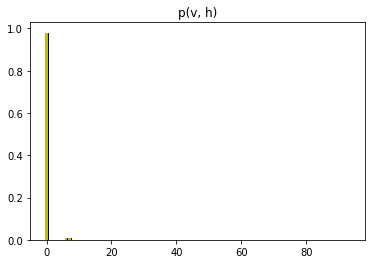

In [ ]:
#theoretical values p(v, h)
probs_hv = []
idx = []
for i in range(len(visible)):
  rbm.v = visible[i]
  for j in range(len(hidden)):
    rbm.h = hidden[j]
    idx.append((i, j))
    probs_hv.append(np.exp(-rbm.calcEnergy()))

print('theoretical:')
theory = {}
Z = np.sum(np.array(probs_hv))
for i in range(len(probs_hv)):
  probs_hv[i] = probs_hv[i]/Z
  h = stateToInt(hidden[idx[i][1]])
  v = stateToInt(visible[idx[i][0]])
  if(h*v in theory.keys()):
    theory[h*v] += probs_hv[i]
  else:
    theory[h*v] = probs_hv[i]

theory_ord = collections.OrderedDict(sorted(theory.items()))

print('from sampling:')
sample = {}
for i in range(len(pairs)):
  if(pairs[i] in sample.keys()):
    sample[pairs[i]] += 1
  else:
    sample[pairs[i]] = 1

for i in sample.keys():
  sample[i] = sample[i]/100000

sample_ord = collections.OrderedDict(sorted(sample.items()))
print(theory_ord.keys())
print(sample_ord.keys())

differences = []
sample_idx = 0
for i in range(len(list(theory_ord.values()))):
  if(list(sample_ord.keys())[sample_idx] != list(theory_ord.keys())[i]):
    differences.append(list(theory_ord.values())[i])
  else:
    differences.append(list(theory_ord.values())[i] - list(sample_ord.values())[sample_idx])
    if(sample_idx < len(list(sample_ord.keys()))-1):
      sample_idx += 1

print('Average difference:', np.mean(np.abs(differences)))
print('Max Difference:', np.max(differences))

plt.bar(list(theory_ord.keys()), theory_ord.values(), color='b', fill = False)
plt.bar(list(sample_ord.keys()), sample_ord.values(), color='y')
plt.title('p(v, h)')

Average difference: 0.00014377050324334043
Max Difference: 0.001044544397447611


Text(0.5, 1.0, 'p(v)')

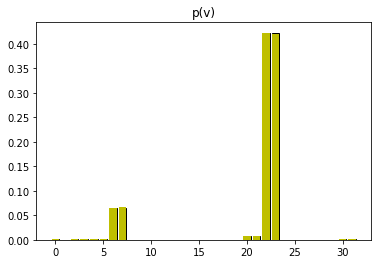

In [ ]:
#theoretical values p(v)
probs_v = []
denom = 0
for v in visible:
  sum_h = 0
  rbm.v = v
  for h in hidden:
    rbm.h = h
    sum_h += np.exp(-rbm.calcEnergy())

  denom += sum_h
  probs_v.append(sum_h)

theory = {}
for i in range(len(probs_v)):
  probs_v[i] = probs_v[i]/denom
  v_int = stateToInt(visible[i])
  if(v_int in theory.keys()):
    print('adding')
    theory[v_int] += probs_v[i]
  else:
    theory[v_int] = probs_v[i]

theory_ord = collections.OrderedDict(sorted(theory.items()))

sample = {}
for i in range(len(vfs)):
  if(vfs[i] in sample.keys()):
    sample[vfs[i]] += 1
  else:
    sample[vfs[i]] = 1

for i in sample.keys():
  sample[i] = sample[i]/100000

sample_ord = collections.OrderedDict(sorted(sample.items()))
#sample_ord = rbm.get_p()
differences = []
sample_idx = 0
for i in range(len(list(theory_ord.values()))):
  if(list(sample_ord.keys())[sample_idx] != list(theory_ord.keys())[i]):
    differences.append(list(theory_ord.values())[i])
  else:
    differences.append(list(theory_ord.values())[i] - list(sample_ord.values())[sample_idx])
    if(sample_idx < len(list(sample_ord.keys()))-1):
      sample_idx += 1

print('Average difference:', np.mean(np.abs(differences)))
print('Max Difference:', np.max(differences))

plt.bar(list(theory_ord.keys()), theory_ord.values(), color='b', fill = False)
plt.bar(list(sample_ord.keys()), sample_ord.values(), color='y')
plt.title('p(v)')

In [ ]:
print(list(sample_ord.values()))

In [ ]:
#theoretical values p(h)
probs_h = []
denom = 0
for h in hidden:
  sum_v = 0
  rbm.h = h
  for v in visible:
    rbm.v = v
    sum_v += np.exp(-rbm.calcEnergy())

  denom += sum_v
  probs_h.append(sum_v)

theory = {}
for i in range(len(probs_h)):
  probs_h[i] = probs_h[i]/denom
  h_int = stateToInt(hidden[i])
  if(h_int in theory.keys()):
    theory[h_int] += probs_h[i]
  else:
    theory[h_int] = probs_h[i]

theory_ord = collections.OrderedDict(sorted(theory.items()))

print('from sampling:')
sample = {}
for i in range(len(hfs)):
  if(hfs[i] in sample.keys()):
    sample[hfs[i]] += 1
  else:
    sample[hfs[i]] = 1

for i in sample.keys():
  sample[i] = sample[i]/100000

sample_ord = collections.OrderedDict(sorted(sample.items()))

differences = []
sample_idx = 0
for i in range(len(list(theory_ord.values()))):
  if(list(sample_ord.keys())[sample_idx] != list(theory_ord.keys())[i]):
    differences.append(list(theory_ord.values())[i])
  else:
    differences.append(list(theory_ord.values())[i] - list(sample_ord.values())[sample_idx])
    if(sample_idx < len(list(sample_ord.keys()))-1):
      sample_idx += 1

print('Average difference:', np.mean(np.abs(differences)))
print('Max Difference:', np.max(differences))

plt.bar(list(theory_ord.keys()), theory_ord.values(), color='y')
plt.bar(list(sample_ord.keys()), sample_ord.values(), color='b', fill = False)
plt.title('p(h)')

## Unsupervised Learning and Training

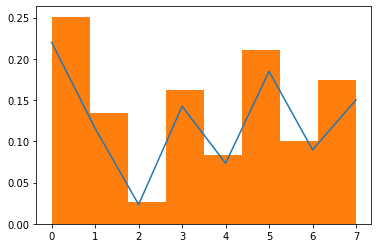

In [ ]:
prob_dist=np.random.ranf(8)
prob_dist=prob_dist/np.sum(prob_dist)
samples=np.random.choice(range(0,8),p=prob_dist,size=100000)

### Below just for plotting the distribution you got
plt.plot(prob_dist)
plt.hist(samples,density=True,bins=8)
plt.show()

In [ ]:
def stateToInt2(state):
  num = ''
  for s in state:
    num += str(s)
  return int(num, 2)

In [ ]:
def intToState(num, length):
  output = []
  binary = str(bin(num))[2:]
  while(len(binary) != length):
    binary = '0' + binary
  for i in range(len(binary)):
    if(binary[i] == '0'):
      output.append(0)
    else:
      output.append(1)
  return np.array(output)

In [ ]:
Nv = 3
Nh = 5
v = np.random.choice([0, 1], Nv)
h = np.random.choice([0, 1], Nh)
rbm = RBM(v, h)
rbm.train(40, samples, 64, 0.1, 1)

vfs = []
for i in range(100000):
  vf, hf = rbm.gibbs(10)
  v_int = stateToInt2(vf)
  h_int = stateToInt2(hf)
  vfs.append(v_int)

print(vfs)

Error at epoch 0 is 509.73941782237245
Error at epoch 1 is 131.43737402364516
Error at epoch 2 is 56.30997671356021
Error at epoch 3 is 34.77351832952892
Error at epoch 4 is 25.90357980254393
Error at epoch 5 is 20.160786990839178
Error at epoch 6 is 17.659883133586497
Error at epoch 7 is 14.565787869178946
Error at epoch 8 is 13.651964415602482
Error at epoch 9 is 11.878282535633781
Error at epoch 10 is 10.744256029515206
Error at epoch 11 is 9.187631712856463
Error at epoch 12 is 9.345219775275526
Error at epoch 13 is 8.45627194895204
Error at epoch 14 is 8.093405996383936
Error at epoch 15 is 7.603904124150295
Error at epoch 16 is 7.051808979040309
Error at epoch 17 is 6.473156221922298
Error at epoch 18 is 6.300356524840894
Error at epoch 19 is 5.9239087160143
Error at epoch 20 is 5.8397389264025
Error at epoch 21 is 5.717176835115586
Error at epoch 22 is 5.332488087064307
Error at epoch 23 is 4.781964822596427
Error at epoch 24 is 4.426223401739643
Error at epoch 25 is 4.503921154

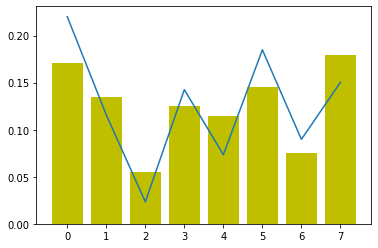

In [ ]:
sample = {}
for i in range(len(vfs)):
  if(vfs[i] in sample.keys()):
    sample[vfs[i]] += 1
  else:
    sample[vfs[i]] = 1

for i in sample.keys():
  sample[i] = sample[i]/100000

sample_ord = collections.OrderedDict(sorted(sample.items()))
plt.bar(list(sample_ord.keys()), sample_ord.values(), color='y')
plt.plot(prob_dist)
#plt.hist(samples, density=True,bins=8, alpha=0.6)

## Free Energy

In [ ]:
Nv = 3
Nh = 5
v = np.random.choice([-1, 1], Nv)
h = np.random.choice([-1, 1], Nh)
rbm = RBM(v, h)

In [ ]:
v = np.array([1, 1, 1])
print(rbm.free_energy_sum(v))
print(rbm.free_energy_en(v))

-1.9239652432395196
-1.92396524323952


Error at epoch 0 is 11.51023379287336
Error at epoch 1 is 10.831012425372087
Error at epoch 2 is 9.53078523945688
Error at epoch 3 is 8.895118037599095
Error at epoch 4 is 8.25357590611813
Error at epoch 5 is 8.032937980099494
Error at epoch 6 is 6.753530698923947
Error at epoch 7 is 6.804249205969394
Error at epoch 8 is 6.4449825635351
Error at epoch 9 is 5.71642120749563
None


ValueError: ignored

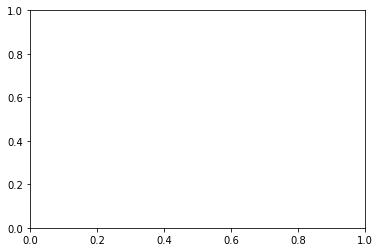

In [ ]:
energies = rbm.train(10, samples, 64, 0.1, 1)
xs = np.linspace(0, 9, 10)
print(energies)
plt.plot(xs, energies)
plt.xlabel('Epoch')
plt.ylabel('Free Energy')

# MNIST Data

In [ ]:
import numpy as np
import torch
import torch.utils.data
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
from torchvision.utils import make_grid , save_image
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:

batch_size = 1
train_loader = torch.utils.data.DataLoader(datasets.MNIST('./data',
    train=True,
    download = True,
    transform = transforms.Compose(
        [transforms.ToTensor()])
     ),
     batch_size=batch_size
)
myData=[]
for idx, (data,target) in enumerate(train_loader):
  myData.append(np.array(data.view(-1,784)).flatten())

print(np.shape(myData[0]))
myData=np.matrix(myData)

test_loader = torch.utils.data.DataLoader(
datasets.MNIST('./data',
    train=False,
    transform=transforms.Compose(
    [transforms.ToTensor()])
    ),
    batch_size=batch_size)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

(784,)


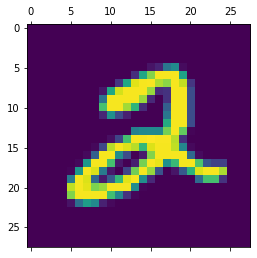

In [ ]:
pic=np.copy(myData[5,:])
pic=pic.reshape((28,28))
plt.matshow(pic)
plt.show()

In [ ]:
def PlotMe(data):
  output = np.zeros((224, 224))
  #data is 64x784 array of numbers
  #this is 64 numbers, each 784 row is reshaped to 28c28 to display number
  data_idx = 0
  for i in range(8):
    for j in range(8):
      pic=np.copy(data[data_idx])
      pic=pic.reshape((28,28))
      output[i*28:i*28+28, j*28:j*28+28] = pic
      data_idx += 1
  plt.matshow(output)

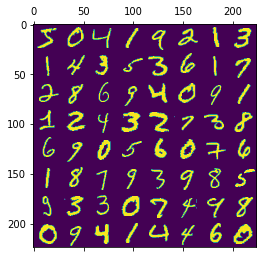

In [ ]:
PlotMe(myData[0:64,:])

In [ ]:
def make_one_zero(data):
  output = np.zeros(data.shape)
  for i in range(data.shape[0]):
    for j in range(data.shape[1]):
      p = data[i,j]
      rand = np.random.rand()
      if(rand < p):
        output[i,j] = 1
  return output

In [ ]:
print(myData.shape)

(60000, 784)


In [ ]:
np.set_printoptions(threshold=np.inf)
dat = make_one_zero(myData)

In [ ]:
Nv = 784
Nh = 100
v = np.random.choice([-1, 1], Nv)
h = np.random.choice([-1, 1], Nh)
rbm = RBM(v, h, 'MNIST')

rbm.train(20, dat, 64, 0.1, 1, 'MNIST')

Error at epoch 0 is 37910.59984748215
Error at epoch 1 is 28239.93789315473
Error at epoch 2 is 26285.492617112293
Error at epoch 3 is 25230.405145352186
Error at epoch 4 is 24520.007556113676
Error at epoch 5 is 23991.21165667506
Error at epoch 6 is 23596.52530659965
Error at epoch 7 is 23309.898706277258
Error at epoch 8 is 23051.912838242966
Error at epoch 9 is 22862.937924439546
Error at epoch 10 is 22669.468358807215
Error at epoch 11 is 22535.401915271646
Error at epoch 12 is 22416.272525442575
Error at epoch 13 is 22318.734033162134
Error at epoch 14 is 22228.35210182769
Error at epoch 15 is 22146.806778805203
Error at epoch 16 is 22077.132803694494
Error at epoch 17 is 21986.443039378588
Error at epoch 18 is 21943.095702130813
Error at epoch 19 is 21885.906608023815


In [ ]:
def reconstruct(v):
  ph0, h0 = rbm.h_given_v(v)
  pv1, v1 = rbm.v_given_h(ph0)
  return pv1

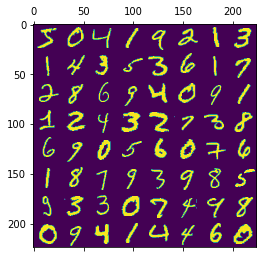

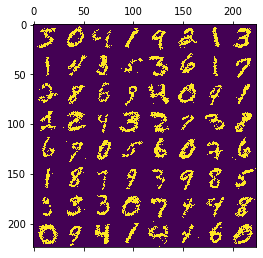

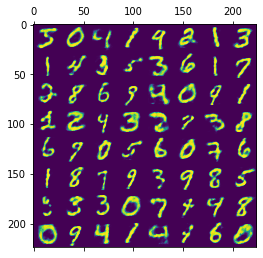

In [ ]:
data = []
orig = []
recon = []
visible = np.copy(myData[0:64,:])
for v in visible:
  rbm.v = v
  vf, hf = rbm.gibbs(1)
  orig.append(v)
  recon.append(reconstruct(vf))
  data.append(vf)

PlotMe(orig)
plt.show()
PlotMe(data)
plt.show()
PlotMe(recon)

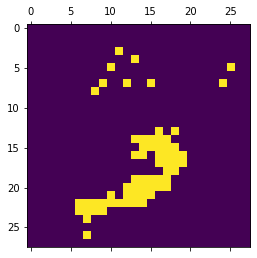

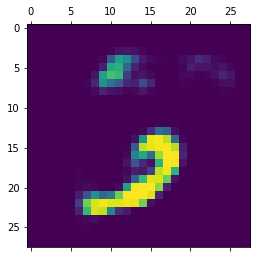

In [ ]:
v = make_one_zero(np.copy(myData[0,:]))
for i in range(len(v[0])//2):
  v[0][i] = 0
rbm.v = v
vf, hf = rbm.gibbs(1)
v_r = reconstruct(vf)
plt.matshow(vf.reshape((28,28)))
plt.show()
plt.matshow(v_r.reshape((28, 28)))

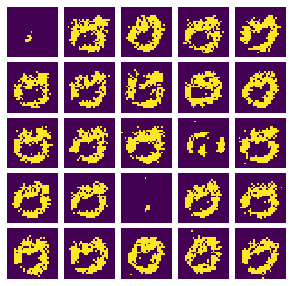

In [ ]:
fig, axes = plt.subplots(5,5, gridspec_kw = {'wspace':0.1, 'hspace':0.1}, figsize=(5,5))
for i in range(5):
  for j in range(5):
    v = np.random.choice([0,1], Nv)
    rbm.v = v
    for idx in range(10000):
      vf, hf = rbm.gibbs(1)
    axes[i,j].matshow(vf.reshape((28, 28)))
    axes[i, j].axis('off')

plt.show()

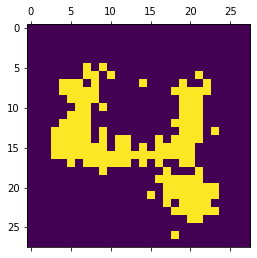

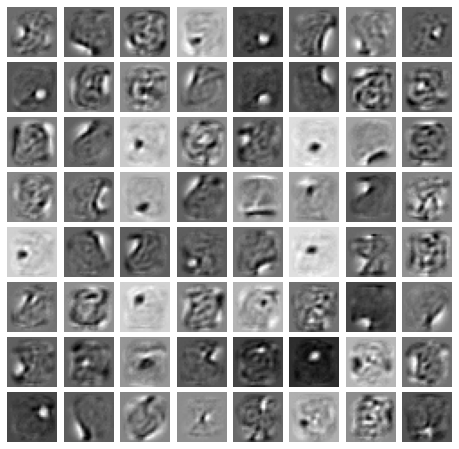

In [ ]:
fig, axes = plt.subplots(8,8, gridspec_kw = {'wspace':0.1, 'hspace':0.1}, figsize=(8, 8))
for i in range(8):
  for j in range(8):
    axes[i, j].imshow(rbm.weights[:,i*10+j].reshape(28, 28), cmap=plt.cm.binary)
    axes[i, j].axis('off')

plt.show()

In [ ]:
v = make_one_zero(np.copy(myData[0,:]))
print('written digit energy:', rbm.free_energy_sum(v[0]))
v_rand = np.random.choice([-1, 1], Nv)
print('random noise energy:', rbm.free_energy_sum(v_rand))

written digit energy: -349.7014704556211
random noise energy: -995.0447990441139


# Protein Sequences

In [ ]:
!pip install bio

     |████████████████████████████████| 269 kB 5.7 MB/s 
     |████████████████████████████████| 2.3 MB 49.7 MB/s 


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PF00014_mgap6.fasta.txt to PF00014_mgap6.fasta (1).txt


In [ ]:
import pylab as plt
import random
from Bio import SeqIO
import numpy as np
import time
get_bin = lambda x, n: format(x, 'b').zfill(n)

p=dict()
count=0
input_file='PF00014_mgap6.fasta.txt'
fasta_sequences = SeqIO.parse(open(input_file),'fasta')
for fasta in fasta_sequences:
    name, sequence = fasta.id, str(fasta.seq)
    for s in sequence:
        if s not in p.keys():
            p[s]=[0 if k=='0' else 1 for k in get_bin(count,5)]
            count=count+1

def SeqToIsing(sequence):
    visible=[]
    for s in sequence:
        visible=visible+p[s]
    return np.array(visible)

input_file='PF00014_mgap6.fasta.txt'
fasta_sequences = list(SeqIO.parse(open(input_file),'fasta'))

sequences=[]
for seq in fasta_sequences:
    sequences.append(SeqToIsing(seq))
sequences=np.array(sequences)

In [ ]:
print(len(sequences[0]))

265


In [ ]:
Nv = 265
Nh = 20
v = np.random.choice([-1, 1], Nv)
h = np.random.choice([-1, 1], Nh)
rbm = RBM(v, h, 'MNIST')

energies = rbm.train(20, sequences, 64, 0.1, 1, 'MNIST')

Error at epoch 0 is 8960.568164901972
Error at epoch 1 is 8739.582293379668
Error at epoch 2 is 8311.711421096392
Error at epoch 3 is 7979.437153641618
Error at epoch 4 is 7776.861991980771
Error at epoch 5 is 7649.49233022318
Error at epoch 6 is 7580.606663705731
Error at epoch 7 is 7519.457740088648
Error at epoch 8 is 7462.298334367969
Error at epoch 9 is 7427.660769444931
Error at epoch 10 is 7413.150815994708
Error at epoch 11 is 7395.047846990568
Error at epoch 12 is 7371.79777716218
Error at epoch 13 is 7343.91504103226
Error at epoch 14 is 7325.415046171258
Error at epoch 15 is 7318.472433099555
Error at epoch 16 is 7301.73395371365
Error at epoch 17 is 7283.126712284587
Error at epoch 18 is 7262.396741160268
Error at epoch 19 is 7244.436817199406


[-72.60051633102596, -79.97998178089576, -89.94720008823248, -98.69868801477087, -105.6235815725293, -111.03215376467635, -114.63811505525122, -117.90873703865599, -121.3765686855172, -124.44072815091036, -126.26266837880482, -127.48906759885347, -129.56879233554173, -132.26737206958447, -133.68766924482748, -134.61696742431008, -135.13726481763936, -136.63047976195102, -139.46861432094232, -140.5643579480486]


Text(0, 0.5, 'Free Energy')

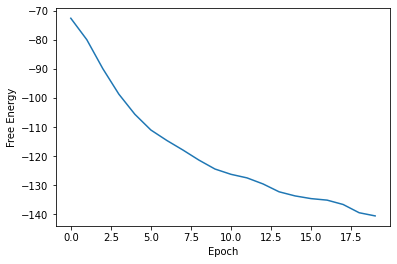

In [ ]:
xs = np.linspace(0, 19, 20)
print(energies)
plt.plot(xs, energies)
plt.xlabel('Epoch')
plt.ylabel('Free Energy')

In [ ]:
count_3 = 0
for s in sequences:
  if(s[2] == 1):
    count_3 += 1
print(count_3/len(sequences))

0.3189705882352941


In [ ]:
counts = []
for s in sequences:
  for i in range(len(s)):
    if(s[i] == 1):
      counts.append(i)

In [ ]:
one = []
for i in range(10000):
  vf, hf = rbm.gibbs(1)
  one.append(vf)

counts2 = []
for s in one:
  for i in range(len(s)):
    if(s[i] == 1):
      counts2.append(i)
#print(rbm.avg_free_energy(one, 'MNIST'))
#print(rbm.avg_free_energy(sequences, 'MNIST'))

In [ ]:
count_3 = 0
for s in one:
  if(s[2] == 1):
    count_3 += 1
print(count_3/len(one))

0.2995


(array([0.00305626, 0.00389289, 0.00421276, 0.00415225, 0.00411677,
        0.00364727, 0.00471924, 0.00340275, 0.00348882, 0.00318977]),
 array([  0. ,  26.4,  52.8,  79.2, 105.6, 132. , 158.4, 184.8, 211.2,
        237.6, 264. ]),
 <a list of 10 Patch objects>)

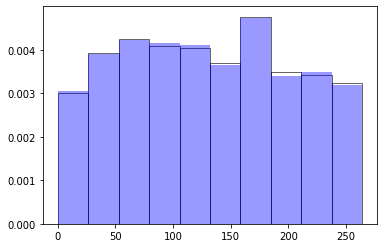

In [ ]:
plt.hist(counts, density=True, alpha=0.6, color='y', fill=False)
plt.hist(counts2, density=True, alpha=0.4, color='b')